<img src="https://i.imgur.com/fVakQcm.png">

# 2021년 데이터 크리에이티브 캠프 - 본선 A팀
장소:   
날짜: 2021년 11월 20일 (토)  

<br>
<br>

<div align='right'>출제자: <b>성민석</b></div>
<div align='right'>minsuksung@korea.ac.kr</div>

<br>
<br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#대회-소개" data-toc-modified-id="대회-소개-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>대회 소개</a></span></li><li><span><a href="#라이브러리-및-옵션" data-toc-modified-id="라이브러리-및-옵션-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>라이브러리 및 옵션</a></span></li><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#학습-및-검증-데이터-분리" data-toc-modified-id="학습-및-검증-데이터-분리-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>학습 및 검증 데이터 분리</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#학습-및-평가" data-toc-modified-id="학습-및-평가-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>학습 및 평가</a></span></li><li><span><a href="#결과-제출하기" data-toc-modified-id="결과-제출하기-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>결과 제출하기</a></span></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

## 대회 소개
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

<img src="https://cdn.pixabay.com/photo/2016/11/02/14/32/lotte-world-tower-1791802_1280.jpg" width=50%>

국내에는 도시별로 다양한 종류의 랜드마크가 있습니다. 그 중 잘 설계해둔 랜드마크 하나는 열 관광지 부럽지 않은 경제효과를 줍니다. 랜드마크를 통한 관광 수입은 연간 수조에 이를 만큼 국가 경제에 막대한 영향을 끼칩니다. 

## 라이브러리 및 옵션
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />



In [2]:
import os
import sys
import glob
import time
import cv2                                           # pip install opencv-python
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# import albumentations as A
from tqdm.notebook import tqdm                       # pip install tqdm
from PIL import Image, ImageOps
from scipy.spatial import ConvexHull
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
# from albumentations.pytorch import ToTensorV2        # pip install albumentations
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import time
import os
import copy

In [4]:
from google.colab import drive
drive.mount('/content/drive')  # 데이터와 

Mounted at /content/drive


In [5]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
cp /content/drive/MyDrive/2021-data-creator-camp-1120.zip data.zip

In [7]:
!unzip data.zip

Archive:  data.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test/test/0C6A0IZL9A.jpg  
  inflating: test/test/0COBTUDHKN.jpg  
  inflating: test/test/0D631SSO6Q.jpg  
  inflating: test/test/0F3KK6AZJS.jpg  
  inflating: test/test/0F5DT7MAZC.jpg  
  inflating: test/test/0GDFMXALAI.jpg  
  inflating: test/test/0JP6I6L0BW.jpg  
  inflating: test/test/0LHY4KF4I8.jpg  
  inflating: test/test/0MULBS2ZLZ.jpg  
  inflating: test/test/0SHLGG08MN.jpg  
  inflating: test/test/0UBRKTHGDI.jpg  
  inflating: test/test/132BKYJM3A.jpg  
  inflating: test/test/13UQIHGU0T.jpg  
  inflating: test/test/143O95MCQZ.jpg  
  inflating: test/test/15EVHXHKTO.jpg  
  inflating: test/test/1BB616WL5G.jpg  
  inflating: test/test/1BCV9YTXT5.jpg  
  inflating: test/test/1BNRER5IUJ.jpg  
  inflating: test/test/1DUOD3HPDH.jpg  
  inflating: test/test/1ESK9MSJKV.jpg  
  inflating: test/test/1JS45NAO2R.jpg  
  inflating: test/test/1KC9SKK3SL.jpg  
  inflating: test/test/1N

In [9]:
!mkdir data

나눔 글꼴 설치  
apt-get 명령으로 나눔글꼴(fonts-nanum)을 설치하고, fc-cache 명령으로 폰트 캐시 삭제
```bash
$ sudo apt-get install fonts-nanum*
$ sudo fc-cache -fv
```

만일 다른 ttf 폰트를 가져왔다면 다음과 같이 복사하고, fc-cache 명령으로 폰트 캐시 삭제
```bash
$ sudo cp new_font.ttf /usr/share/fonts/
$ sudo fc-cache -fv
```

matplotlib 나눔 글꼴을 추가
나눔 글꼴을 matplotlib 에 복사하고, matplotlib의 폰트 캐시를 삭제
```bash
$ sudo cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.4/dist-packages/matplotlib/mpl-data/fonts/ttf/
$ rm -rf /home/ubuntu/.cache/matplotlib/*
```

In [10]:
pwd

'/content'

## 데이터 불러오기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

주어진 데이터는 391종의 서울시 랜드마크가 있습니다. 그 중에서 임의로 30종의 랜드마크만 샘플링되어 데이터가 제공됩니다. 각 랜드마크당 100여장의 데이터가 제공됩니다. 그렇게 총 3,000장의 데이터가 주어집니다.


In [11]:
data = pd.read_csv('/content/train.csv',encoding='utf8')
data

,path,class
0,./data/train/5I096DQEE2.jpg,3
1,./data/train/1NV9ZMEIB5.jpg,0
2,./data/train/M9VLJNHD38.jpg,7
3,./data/train/R411LJY55S.jpg,6
4,./data/train/A5G82IF4MX.jpg,0
...,...,...
730,./data/train/RFU3JMRTW7.jpg,3
731,./data/train/MG88J89S82.jpg,8
732,./data/train/PKCRXALLS6.jpg,5
733,./data/train/Z21XYXVAQD.jpg,3


In [12]:
test = pd.read_csv('/content/test.csv',encoding='utf8')
test

,path,class
0,./data/test/258YQ4X7F7.jpg,0
1,./data/test/WETTACUP8N.jpg,0
2,./data/test/ZKU5T5ECEE.jpg,0
3,./data/test/R105VOAVXA.jpg,0
4,./data/test/ZJSO03ZXTO.jpg,0
...,...,...
179,./data/test/3BQWFYQT54.jpg,0
180,./data/test/899NFYC3TN.jpg,0
181,./data/test/ZRO60FUB4V.jpg,0
182,./data/test/0MULBS2ZLZ.jpg,0


In [13]:
submission = pd.read_csv('/content/sample_submission.csv',encoding='utf8')
submission

,path,class
0,./data/test/258YQ4X7F7.jpg,0
1,./data/test/WETTACUP8N.jpg,0
2,./data/test/ZKU5T5ECEE.jpg,0
3,./data/test/R105VOAVXA.jpg,0
4,./data/test/ZJSO03ZXTO.jpg,0
...,...,...
179,./data/test/3BQWFYQT54.jpg,0
180,./data/test/899NFYC3TN.jpg,0
181,./data/test/ZRO60FUB4V.jpg,0
182,./data/test/0MULBS2ZLZ.jpg,0


In [14]:
landmarks_class = [
    '서울한양도성',
    '충무공 이순신 동상',
    '김포국제공항',
    '세빛섬',
    '정릉',
    '양화대교',
    '서울광장',
    '북촌 한옥마을',
    '롯데월드타워',
    '경복궁'
]

## EDA
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

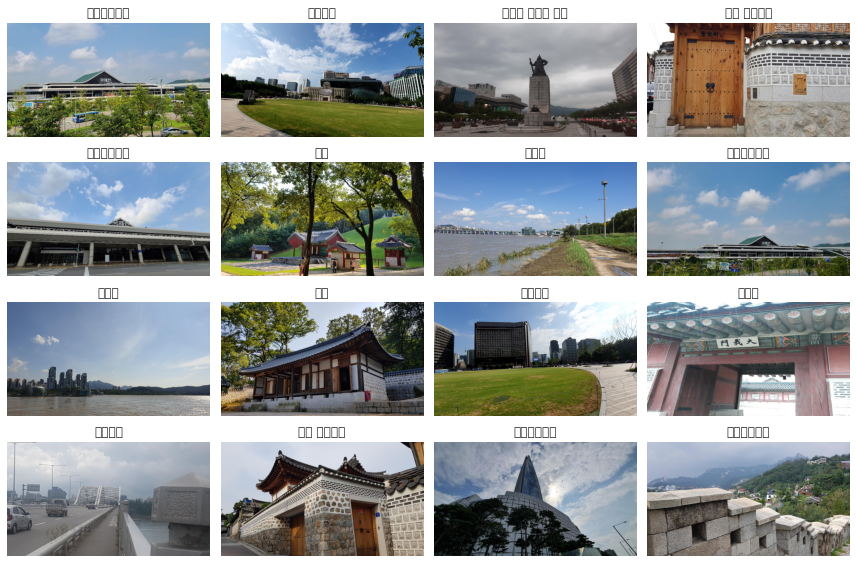

In [15]:
plt.figure(figsize=(12,8))
for n, (idx, row) in enumerate(data.sample(16).iterrows(), start=1):
    plt.subplot(4,4, n)
    img = plt.imread(row['path'])
    plt.imshow(img)
    plt.title(landmarks_class[row['class']])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 학습 및 검증 데이터 분리
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [16]:
train, valid = train_test_split(data,
                                test_size=0.2,
                                random_state=42)

In [17]:
train

,path,class
135,./data/train/ONZHQZFUUL.jpg,5
473,./data/train/AXWZ4X974B.jpg,6
254,./data/train/MHYXWSBOIL.jpg,2
525,./data/train/32DJV8BN9Q.jpg,0
164,./data/train/UWW030QCCO.jpg,7
...,...,...
71,./data/train/3ZOPD7UHXH.jpg,8
106,./data/train/W579CRLAYG.jpg,0
270,./data/train/20TD3EKO2M.jpg,2
435,./data/train/XJBUXFU5UY.jpg,5


In [18]:
valid

,path,class
559,./data/train/12MGBHODVW.jpg,6
33,./data/train/FNXANHA18V.jpg,5
275,./data/train/S37EJRUYO3.jpg,8
198,./data/train/OJJT64BYO3.jpg,5
192,./data/train/A1JE2TWCPY.jpg,0
...,...,...
44,./data/train/E6J6K77904.jpg,0
70,./data/train/YRIN0W3V85.jpg,2
196,./data/train/JXAUU15CXC.jpg,6
576,./data/train/XI43SN0WOU.jpg,8


In [106]:
class LandmarksDataset(Dataset):
    def __init__(self, data, transforms):
        self.data = data
        self.transforms = transforms

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index: int):
        assert index <= len(self), 'index range error'

        image = plt.imread(self.data.iloc[index, ]['path']) ## PIL 불러오기
        image = transforms.ToPILImage()(image)
        
        target = torch.as_tensor(self.data.iloc[index, ]['class'])

        if self.transforms is not None:
            image = self.transforms(image)

  #      image = image/255.0

        return image, target

In [131]:
transforms_train = transforms.Compose([        ### torch vision transform
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transforms_valid = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [132]:
train_dataset = LandmarksDataset(data=train, transforms=transforms_train)
valid_dataset = LandmarksDataset(data=valid, transforms=transforms_valid)

In [133]:
next(iter(train_dataset))

(tensor([[[ 1.5810,  1.5982,  1.6153,  ..., -2.0152, -1.9980, -1.9980],
          [ 1.5639,  1.5810,  1.5982,  ..., -2.0152, -1.9809, -1.9638],
          [ 1.5125,  1.5639,  1.5982,  ..., -2.0323, -2.0152, -2.0152],
          ...,
          [ 2.2489,  2.2489,  2.2489,  ...,  0.1426,  0.1426,  0.1426],
          [ 2.2489,  2.2489,  2.2489,  ...,  0.1426,  0.1426,  0.1254],
          [ 2.2489,  2.2489,  2.2489,  ...,  0.1426,  0.1426,  0.1254]],
 
         [[ 1.9909,  2.0084,  2.0434,  ..., -1.8606, -1.8431, -1.8431],
          [ 1.9734,  2.0084,  2.0434,  ..., -1.8606, -1.8256, -1.8081],
          [ 1.9559,  1.9909,  2.0259,  ..., -1.8782, -1.8606, -1.8606],
          ...,
          [ 2.4286,  2.4286,  2.4286,  ...,  0.2577,  0.2577,  0.2577],
          [ 2.4286,  2.4286,  2.4286,  ...,  0.2577,  0.2577,  0.2402],
          [ 2.4286,  2.4286,  2.4286,  ...,  0.2577,  0.2577,  0.2402]],
 
         [[ 2.6400,  2.6400,  2.6400,  ..., -1.6127, -1.5953, -1.5953],
          [ 2.6400,  2.6226,

In [134]:
batch_size = 4

In [135]:
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [136]:
images[0].numpy().shape

TypeError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packa

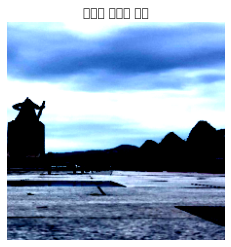

In [137]:
images, targets = next(iter(train_dataloader))
plt.imshow(images[0].numpy().transpose(1,2,0))
plt.title(landmarks_class[targets[0]])
plt.axis('off')
plt.show()

## 모델링
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [138]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 32, 3, 1)
        self.conv3 = nn.Conv2d(32, 32, 3, 1)
        self.conv4 = nn.Conv2d(32, 32, 3, 1)
        
        self.fc1 = nn.Linear(26912, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        # Apply softmax to x
        output = F.softmax(x, dim=1)
        return output


class Select_model(nn.Module):
    def __init__(self, model_name, num_classes=10, pretrained=False):
        super(Select_model, self).__init__()

        # Use a pretrained model
        if model_name == "vgg":
            self.network = models.vgg16(pretrained=pretrained)
            # Replace last layer
            num_ftrs = self.network.classifier[6].in_features
            self.network.fc = nn.Linear(num_ftrs, num_classes)
        elif model_name == "resnet":  
            self.network = models.resnet18(pretrained=pretrained)
            # Replace last layer
            num_ftrs = self.network.fc.in_features
            self.network.fc = nn.Linear(num_ftrs, num_classes)
        elif model_name == "googlenet":
            self.network = models.googlenet(pretrained=pretrained, aux_logits=False)
            # Replace last layer
            num_ftrs = self.network.fc.in_features
            self.network.fc = nn.Linear(num_ftrs, num_classes)
        elif model_name == "efficientnet_b0":
            self.network = models.efficientnet_b0(pretrained=pretrained, aux_logits=False)
            # Replace last layer
            num_ftrs = self.network.classifier[1].in_features
            self.network.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, xb):
        return self.network(xb)

In [139]:
model = Select_model("efficientnet_b0").to('cuda')
print(model)

Select_model(
  (network): EfficientNet(
    (features): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): ConvNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_acti

In [140]:
sum([p.numel() for p in model.parameters()])

5301358

In [141]:
# Equates to one random 28x28 image
result = model(torch.rand((1, 3, 128, 128)).to('cuda'))
print (result)

tensor([[-0.1875,  0.1981, -0.0177,  0.1527, -0.2254, -0.0795, -0.2166, -0.2637,
          0.1856, -0.0785,  0.0384,  0.0759,  0.1051, -0.0090, -0.0215, -0.1172,
          0.1283, -0.0574, -0.0465,  0.0457, -0.0035, -0.0701,  0.2106, -0.0679,
         -0.2409, -0.1084, -0.1241, -0.1081,  0.3119, -0.2773, -0.1902,  0.0813,
         -0.0859,  0.0554,  0.2372, -0.1729,  0.0292, -0.0530,  0.0440, -0.0350,
         -0.0197,  0.2353,  0.0274,  0.5180, -0.0495,  0.0465,  0.0845,  0.0077,
          0.0405, -0.0308, -0.1452, -0.0041, -0.2594, -0.0967,  0.1824,  0.0185,
          0.0099, -0.1709,  0.1423,  0.3604, -0.0290, -0.2504,  0.0912,  0.0111,
         -0.2079, -0.0234, -0.0272, -0.0631, -0.0508,  0.0838,  0.2085,  0.0210,
          0.0602, -0.0218, -0.1726,  0.1207,  0.1549, -0.4247, -0.0147, -0.2517,
          0.1867, -0.0815, -0.0470,  0.0103,  0.0608, -0.2101,  0.1977,  0.0510,
          0.0615, -0.5052, -0.1352, -0.0381, -0.1199,  0.1833,  0.2297,  0.0082,
         -0.0137, -0.1564,  

## 학습 및 평가
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [142]:
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch,
                                        last_epoch=-1,
                                        verbose=False)
loss_fn = nn.CrossEntropyLoss()

In [143]:
import datetime

In [144]:
epochs = 30
train_losses = []
train_acces = []
valid_losses = []
valid_acces = []

start_time = time.time()

for epoch in range(epochs):
    
    #########
    # Train #
    #########
    model.train()
    train_loss = 0
    train_acc = 0
    for i, (images, targets) in enumerate(train_dataloader):
        images = images.to('cuda')
        targets = targets.to('cuda')

        scores = model(images)
        _, preds = scores.max(dim=1)
        loss = loss_fn(scores, targets)

        train_loss += loss
        train_acc += (targets == preds).sum() / batch_size
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    ##############
    # Validation #
    ##############
    model.eval()
    valid_loss = 0
    valid_acc = 0
    with torch.no_grad():
        for i, (images, targets) in enumerate(valid_dataloader):
            images = images.to('cuda')
            targets = targets.to('cuda')

            scores = model(images)
            _, preds = scores.max(dim=1)

            valid_loss += loss_fn(scores, targets)
            valid_acc += (targets == preds).sum() / batch_size
            
    #######
    # Log #
    #######
    train_losses.append(train_loss.detach().cpu().numpy() / len(train_dataloader))
    train_acces.append(train_acc.detach().cpu().numpy() / len(train_dataloader))
    valid_losses.append(valid_loss.detach().cpu().numpy() / len(valid_dataloader))
    valid_acces.append(valid_acc.detach().cpu().numpy() / len(valid_dataloader))
        

    elapsed_time = time.time() - start_time
        
    print(f"[{time.strftime('%H:%M:%S', time.gmtime(elapsed_time))}] Epoch {epoch+1:2d} \
    Train Loss: {train_losses[-1]:6.4f} Train Acc: {train_acces[-1]:6.4f} \
    Valid Loss: {valid_losses[-1]:6.4f} Valid Acc: {valid_acces[-1]:6.4f}")
scheduler.step()

[00:00:13] Epoch  1     Train Loss: 4.6625 Train Acc: 0.1616     Valid Loss: 3.1125 Valid Acc: 0.2095
[00:00:26] Epoch  2     Train Loss: 2.3709 Train Acc: 0.2585     Valid Loss: 1.8960 Valid Acc: 0.3446
[00:00:40] Epoch  3     Train Loss: 1.9037 Train Acc: 0.3095     Valid Loss: 2.2265 Valid Acc: 0.4122
[00:00:53] Epoch  4     Train Loss: 1.7253 Train Acc: 0.3537     Valid Loss: 1.5573 Valid Acc: 0.4730
[00:01:06] Epoch  5     Train Loss: 1.6054 Train Acc: 0.4048     Valid Loss: 1.2624 Valid Acc: 0.5473
[00:01:20] Epoch  6     Train Loss: 1.5357 Train Acc: 0.4643     Valid Loss: 1.2515 Valid Acc: 0.5676
[00:01:33] Epoch  7     Train Loss: 1.4971 Train Acc: 0.4830     Valid Loss: 1.0082 Valid Acc: 0.6216
[00:01:46] Epoch  8     Train Loss: 1.3349 Train Acc: 0.5374     Valid Loss: 0.9903 Valid Acc: 0.6419
[00:01:59] Epoch  9     Train Loss: 1.2165 Train Acc: 0.5850     Valid Loss: 0.7502 Valid Acc: 0.7230
[00:02:13] Epoch 10     Train Loss: 1.1523 Train Acc: 0.6207     Valid Loss: 0.712

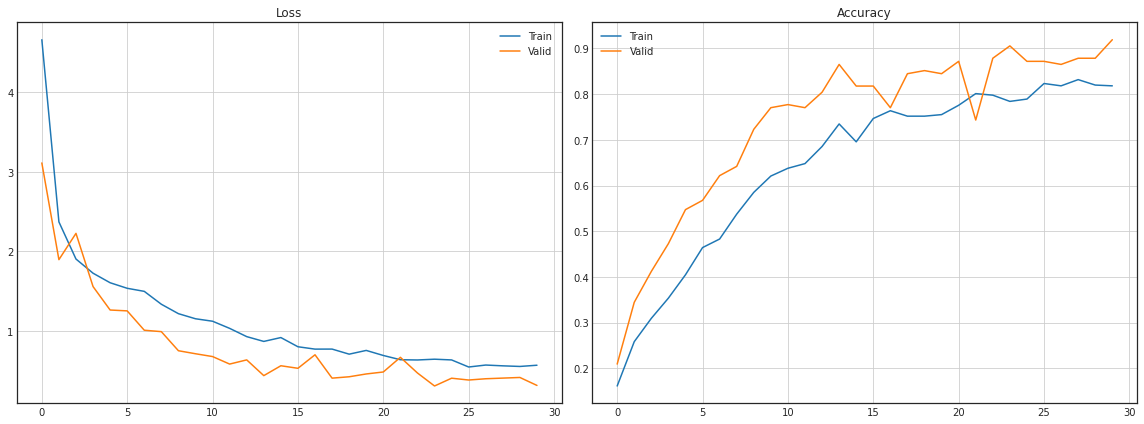

In [152]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(train_losses)
plt.plot(valid_losses)
plt.title('Loss')
plt.legend(['Train','Valid'])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_acces)
plt.plot(valid_acces)
plt.title('Accuracy')
plt.legend(['Train','Valid'])
plt.grid(True)

plt.tight_layout()
plt.show()

## 결과 제출하기
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

In [154]:
transforms_test = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [155]:
test_dataset = LandmarksDataset(data=test, transforms=transforms_test)

In [156]:
test_dataloader = DataLoader(
    test_dataset, batch_size=4, shuffle=True, num_workers=4)

In [157]:
model.eval()
preds = []
with torch.no_grad():
    for i, (images, targets) in tqdm(enumerate(test_dataset)):
        images = images.to('cuda')
        scores = model(images.unsqueeze(0))
        _, pred = scores.max(dim=1)
        
        preds.append(pred.item())

0it [00:00, ?it/s]

In [158]:
submission['class'] = preds

In [159]:
submission

,path,class
0,./data/test/258YQ4X7F7.jpg,4
1,./data/test/WETTACUP8N.jpg,9
2,./data/test/ZKU5T5ECEE.jpg,4
3,./data/test/R105VOAVXA.jpg,6
4,./data/test/ZJSO03ZXTO.jpg,0
...,...,...
179,./data/test/3BQWFYQT54.jpg,1
180,./data/test/899NFYC3TN.jpg,6
181,./data/test/ZRO60FUB4V.jpg,7
182,./data/test/0MULBS2ZLZ.jpg,7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_

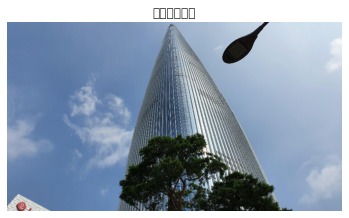

In [160]:
test_path, pred = submission.sample(1).values[0]
plt.imshow(plt.imread(test_path))
plt.title(landmarks_class[pred])
plt.axis('off')
plt.show()

In [161]:
submission.to_csv('./data/submission3.csv', encoding='utf8', index=None)

## 참고자료
<hr style="height:3px;border:none;color:#5F71F7;background-color:#203E60;" />

-